In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merge_table = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
#city_df
#merge_table.head()
bubble_df = merge_table[['city','driver_count','type','fare']]

bubble_df.loc[:,'driver_count'] *= 10
bubble_df.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,city,driver_count,type,fare
0,Richardfort,380,Urban,13.93
1,Richardfort,380,Urban,14.00
2,Richardfort,380,Urban,17.92
3,Richardfort,380,Urban,10.26
4,Richardfort,380,Urban,23.00


In [2]:
urban_m = bubble_df.loc[bubble_df['type']=='Urban',:].groupby(['city']).mean()
suburban_m = bubble_df.loc[bubble_df['type']=='Suburban',:].groupby(['city']).mean()
rural_m = bubble_df.loc[bubble_df['type']=='Rural',:].groupby(['city']).mean()

urban_r = bubble_df.loc[bubble_df['type']=='Urban',:].groupby(['city']).count()
suburban_r = bubble_df.loc[bubble_df['type']=='Suburban',:].groupby(['city']).count()
rural_r = bubble_df.loc[bubble_df['type']=='Rural',:].groupby(['city']).count()

avg_fare_u = urban_m["fare"].tolist()
avg_fare_s = suburban_m["fare"].tolist()
avg_fare_r = rural_m["fare"].tolist()

ride_u = urban_r["fare"].tolist()
ride_s = suburban_r["fare"].tolist()
ride_r = rural_r["fare"].tolist()

driver_u = urban_m["driver_count"].tolist()
driver_s = suburban_m["driver_count"].tolist()
driver_r = rural_m["driver_count"].tolist()

## Bubble Plot of Ride Sharing Data

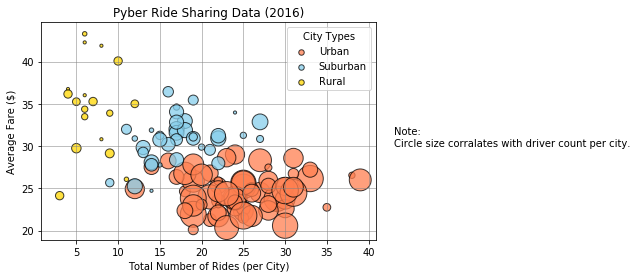

In [51]:
# Obtain the x and y coordinates for each of the three city types
u_x_axis = ride_u
u_y_axis = avg_fare_u
u_size = driver_u

s_x_axis = ride_s
s_y_axis = avg_fare_s
s_size = driver_s

r_x_axis = ride_r
r_y_axis = avg_fare_r
r_size = driver_r


# Build the scatter plots for each city types
plt.scatter(u_x_axis, u_y_axis, marker="o", facecolors="coral", edgecolors="black", s=u_size, alpha=0.75, label='Urban')
plt.scatter(s_x_axis, s_y_axis, marker="o", facecolors="skyblue", edgecolors="black", s=s_size, alpha=0.75, label='Suburban')
plt.scatter(r_x_axis, r_y_axis, marker="o", facecolors="gold", edgecolors="black", s=r_size, alpha=0.75, label='Rural')
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(linestyle='-', linewidth='0.5', color='grey')

# Create a legend
#plt.legend(markerscale=1)
lgnd = plt.legend(title='City Types',loc="upper right", numpoints=1, fontsize=10)

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

plt.text(43,30,"""Note:
Circle size corralates with driver count per city.""")
# Save Figure
plt.savefig('PyberData.png')
plt.show()

## Total Fares by City Type

In [22]:
type_df_group_sum = merge_table.groupby(['type']).sum()
type_df = type_df_group_sum.reset_index()
labels = type_df["type"].tolist()
fare_by_type = type_df["fare"].tolist()
explode = [0,0,0.1]
colors = ['gold','skyblue','lightcoral']

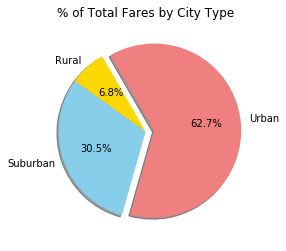

In [23]:
plt.pie(fare_by_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")
plt.savefig('fares_by_city.png')
plt.show()

## Total Rides by City Type

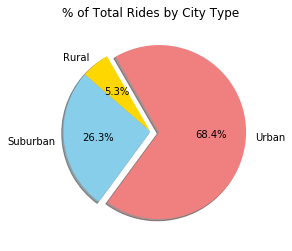

In [24]:
# Calculate Ride Percents
type_df_group_count = merge_table.groupby(['type']).count()
type_df = type_df_group_count.reset_index()
rides_by_type = type_df["fare"].tolist()




plt.pie(rides_by_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig('rides_by_city.png')
plt.show()

## Total Drivers by City Type

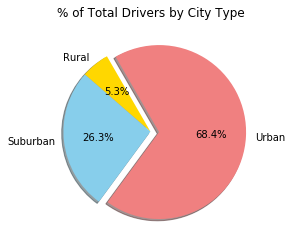

In [25]:
# Calculate Driver Percents
type_df_group_count = merge_table.groupby(['type']).count()
type_df = type_df_group_count.reset_index()
drivers_by_type = type_df["fare"].tolist()

plt.title("% of Total Drivers by City Type")
# Build Pie Charts
plt.pie(drivers_by_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig('drivers_by_city.png')
plt.show()